# STOCK MARKET PREDICTION AND FORECASTING USING STACKED LSTM

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

## Loading *NSE-TATAGLOBAL* dataset

In [4]:
# Load the dataset
df = pd.read_csv('C:/B.Tech/datasets/NSE-TATAGLOBAL.csv')  # Replace with the actual path

## Data exploration

In [12]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [15]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [17]:
df.value_counts()

Date        Open    High    Low     Last    Close   Total Trade Quantity  Turnover (Lacs)
2010-07-21  122.10  123.00  121.05  121.10  121.55  658666                803.56             1
2015-12-29  144.40  144.40  141.20  141.90  141.90  1260484               1794.94            1
2016-01-15  135.00  135.40  127.50  127.65  128.50  1756768               2297.61            1
2016-01-14  132.10  136.25  131.15  133.90  134.05  1431102               1916.53            1
2016-01-13  141.75  141.95  130.30  135.40  135.60  1907971               2586.28            1
                                                                                            ..
2013-03-26  123.10  125.10  122.00  123.40  123.50  1828953               2259.63            1
2013-03-25  127.30  129.25  122.80  123.75  123.55  3225051               4082.77            1
2013-03-22  125.00  127.50  122.60  126.30  125.90  1442967               1806.03            1
2013-03-21  128.55  128.60  123.45  123.80  124.60  280

## Data prepraration

In [18]:
# Extract the 'Close' prices
data = df['Close'].values.reshape(-1, 1)

In [19]:
# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

In [20]:
# Prepare the data
sequence_length = 10  # Number of previous time steps to consider
X = []
y = []
for i in range(len(data_normalized) - sequence_length):
    X.append(data_normalized[i:i+sequence_length])
    y.append(data_normalized[i+sequence_length])
X = np.array(X)
y = np.array(y)

## Stacked LSTM model

In [21]:
# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

In [22]:

# Build the stacked LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predictions = model.predict(X_test)

# Transform predictions back to original scale
predictions = scaler.inverse_transform(predictions)




Epoch 1/50
51/51 [==============================] - 10s 14ms/step - loss: 0.0138
Epoch 2/50
51/51 [==============================] - 1s 12ms/step - loss: 0.0011
Epoch 3/50
51/51 [==============================] - 1s 11ms/step - loss: 0.0011
Epoch 4/50
51/51 [==============================] - 1s 12ms/step - loss: 0.0011
Epoch 5/50
51/51 [==============================] - 1s 12ms/step - loss: 0.0011
Epoch 6/50
51/51 [==============================] - 1s 13ms/step - loss: 0.0011
Epoch 7/50
51/51 [==============================] - 1s 13ms/step - loss: 0.0011
Epoch 8/50
51/51 [==============================] - 1s 11ms/step - loss: 9.9844e-04
Epoch 9/50
51/51 [==============================] - 1s 11ms/step - loss: 0.0010
Epoch 10/50
51/51 [==============================] - 1s 11ms/step - loss: 0.0010
Epoch 11/50
51/51 [==============================] - 1s 11ms/step - loss: 0.0010
Epoch 12/50
51/51 [==============================] - 1s 12ms/step - loss: 9.6123e-04
Epoch 13/50
51/51 [=========

## Visualization

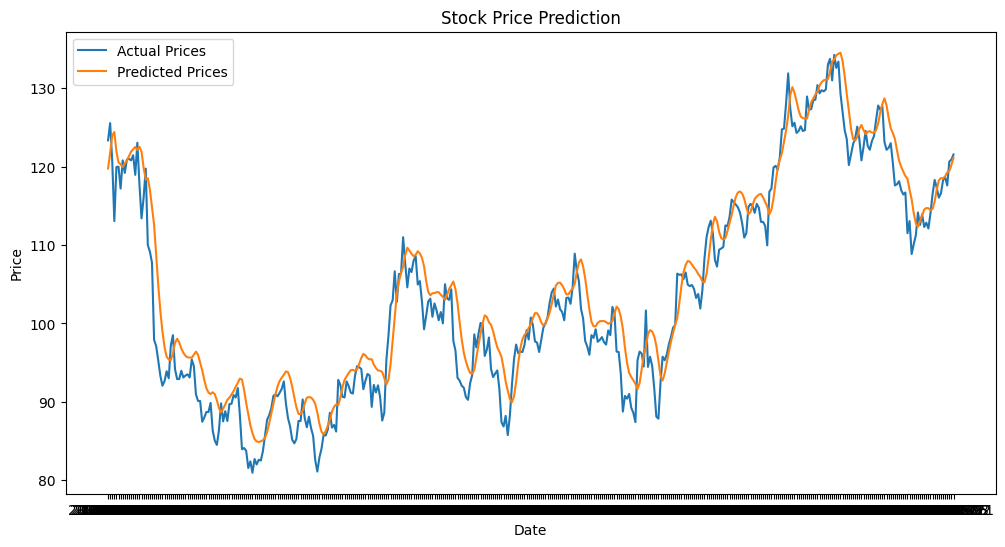

In [11]:
# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(df['Date'][split_index+sequence_length:], df['Close'][split_index+sequence_length:], label='Actual Prices')
plt.plot(df['Date'][split_index+sequence_length:], predictions, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()